# Sommaire

**[Introduction](#intro)**  
  - [Problématique](#problematique)  
  - [Imports Python](#imports)  
  - [Chargement des données](#charg_donnees)

**[Tour d'horizon](#horizon)**  
  - [Types de données](#data_types)  
  - [Structure des données](#structure)  
  - [Valeurs manquantes](#nulls)  
  - [Constat](#constat)

**[Choix d'étude : Nutri-Score](#choix)**  
  - [Calculs et classification du Nutri-Score](#nutriscore)  
  - [Affinage des variables et choix de cible](#affinage)  
  - [Boisson ou pas ?](#boisson)  

**[Nettoyage des données](#nettoyage)**  
  - [Traitement des variables](#features_clean)  
  - [Traitement des observations](#observations_clean)  
  - [Impact du nettoyage](#impact)  
  - [Traitement des outliers](#outliers)  
    - [Planchers et plafonds](#bornes)  
    - [Traitement métier : acides gras](#legrascestlavie)  
    - [Traitement métier : sel](#sel)  

**[Analyse des données](#analyse)**  
  - [Analyse de notre cible : `nutrition_grade_fr`](#analyse_univ)  

**[Suggestions d'améliorations](#ameliorations)**  

# <a name="intro">Introduction</a>

## Problématique <a name="problematique"></a>

L'agence Santé publique France souhaite améliorer sa base de données Open Food Facts et souhaite la création d’un système de **suggestion ou d’auto-complétion** pour aider les usagers à remplir plus efficacement la base de données.

⚠️ MISSION → **nettoyage et exploration** des données en interne, afin de **déterminer la faisabilité de cette idée d’application**.  

Liens utiles : [projet OC](https://openclassrooms.com/fr/paths/794/projects/1500/assignment), [data](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-scientist/P2/fr.openfoodfacts.org.products.csv.zip), [définition des variables](https://world.openfoodfacts.org/data/data-fields.txt)  

## Imports Python <a name="imports"></a>

In [199]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

# render in GitHub & NBViewer
import plotly.io as pio
pio.renderers.default = "notebook_connected"

## Chargement des données <a name="charg_donnees"></a>

In [200]:
# DATASETS_PATH = "/Users/julmat/DataSets/"
DATASETS_PATH = "C:\\Users\\jlemaire\\Documents\\DataSets\\"
dataset_name="oc_p2_openfoodfacts_products.csv"

data_raw = pd.read_csv(DATASETS_PATH+dataset_name, sep="\t", index_col=7)

display(data_raw)

C:\Users\jlemaire\AppData\Local\Temp\ipykernel_19824\623899422.py:5: DtypeWarning:

Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.



,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,generic_name,quantity,packaging,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
product_name,,,,,,,,,,,,,,,,,,,,,
Farine de blé noir,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,NaN,1kg,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Banana Chips Sweetened (Whole),4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
Peanuts,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
Organic Salted Nut Mix,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
Organic Polenta,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tomato & ricotta,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,NaN,1,Plastique,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Mint Melange Tea A Blend Of Peppermint, Lemon Grass And Spearmint",99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,NaN,NaN,Plastique,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
乐吧泡菜味薯片,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,Leba pickle flavor potato chips,50 g,Plastique,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# <a name="horizon">Tour d'horizon</a>

## Types de données <a name="data_types"></a>

Doublons : 0

Type de données :


<Axes: >

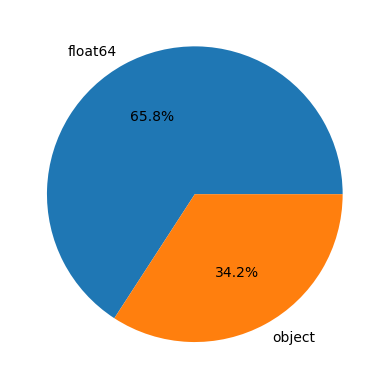

In [201]:
print(f"Doublons : {data_raw.duplicated().sum()}")
print("\nType de données :")

data_raw.dtypes.value_counts().plot.pie(
    autopct="%1.1f%%"
    )

## Structure des données <a name="structure"></a>

In [202]:
with pd.option_context('display.max_rows', 200):
    display(data_raw.describe().T.sort_index())

,count,mean,std,min,25%,50%,75%,max
additives_n,248939.0,1.936024,2.502019e+00,0.000000,0.000000e+00,1.000000,3.000000,3.100000e+01
alcohol_100g,4133.0,7.838105,1.095967e+01,0.000000,0.000000e+00,5.000000,12.000000,9.790000e+01
alpha-linolenic-acid_100g,186.0,2.250285,7.971418e+00,0.000000,6.875000e-02,0.117500,0.604000,7.500000e+01
arachidic-acid_100g,24.0,10.752667,4.019993e+00,0.064000,7.275000e+00,12.850000,13.375000,1.540000e+01
arachidonic-acid_100g,8.0,0.057000,2.553429e-02,0.007000,4.625000e-02,0.061000,0.068500,9.000000e-02
behenic-acid_100g,23.0,10.673913,3.379647e+00,5.200000,7.100000e+00,12.600000,13.050000,1.460000e+01
beta-carotene_100g,34.0,0.518715,2.561144e+00,0.000000,1.225000e-03,0.005261,0.140000,1.500000e+01
bicarbonate_100g,81.0,0.119052,1.894861e-01,0.000006,1.732000e-02,0.036000,0.143000,1.250000e+00
biotin_100g,330.0,0.121290,7.379124e-01,-2.000000,5.725000e-06,0.000014,0.000041,6.000000e+00
butyric-acid_100g,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Valeurs manquantes <a name="nulls"></a>

(161, 2)


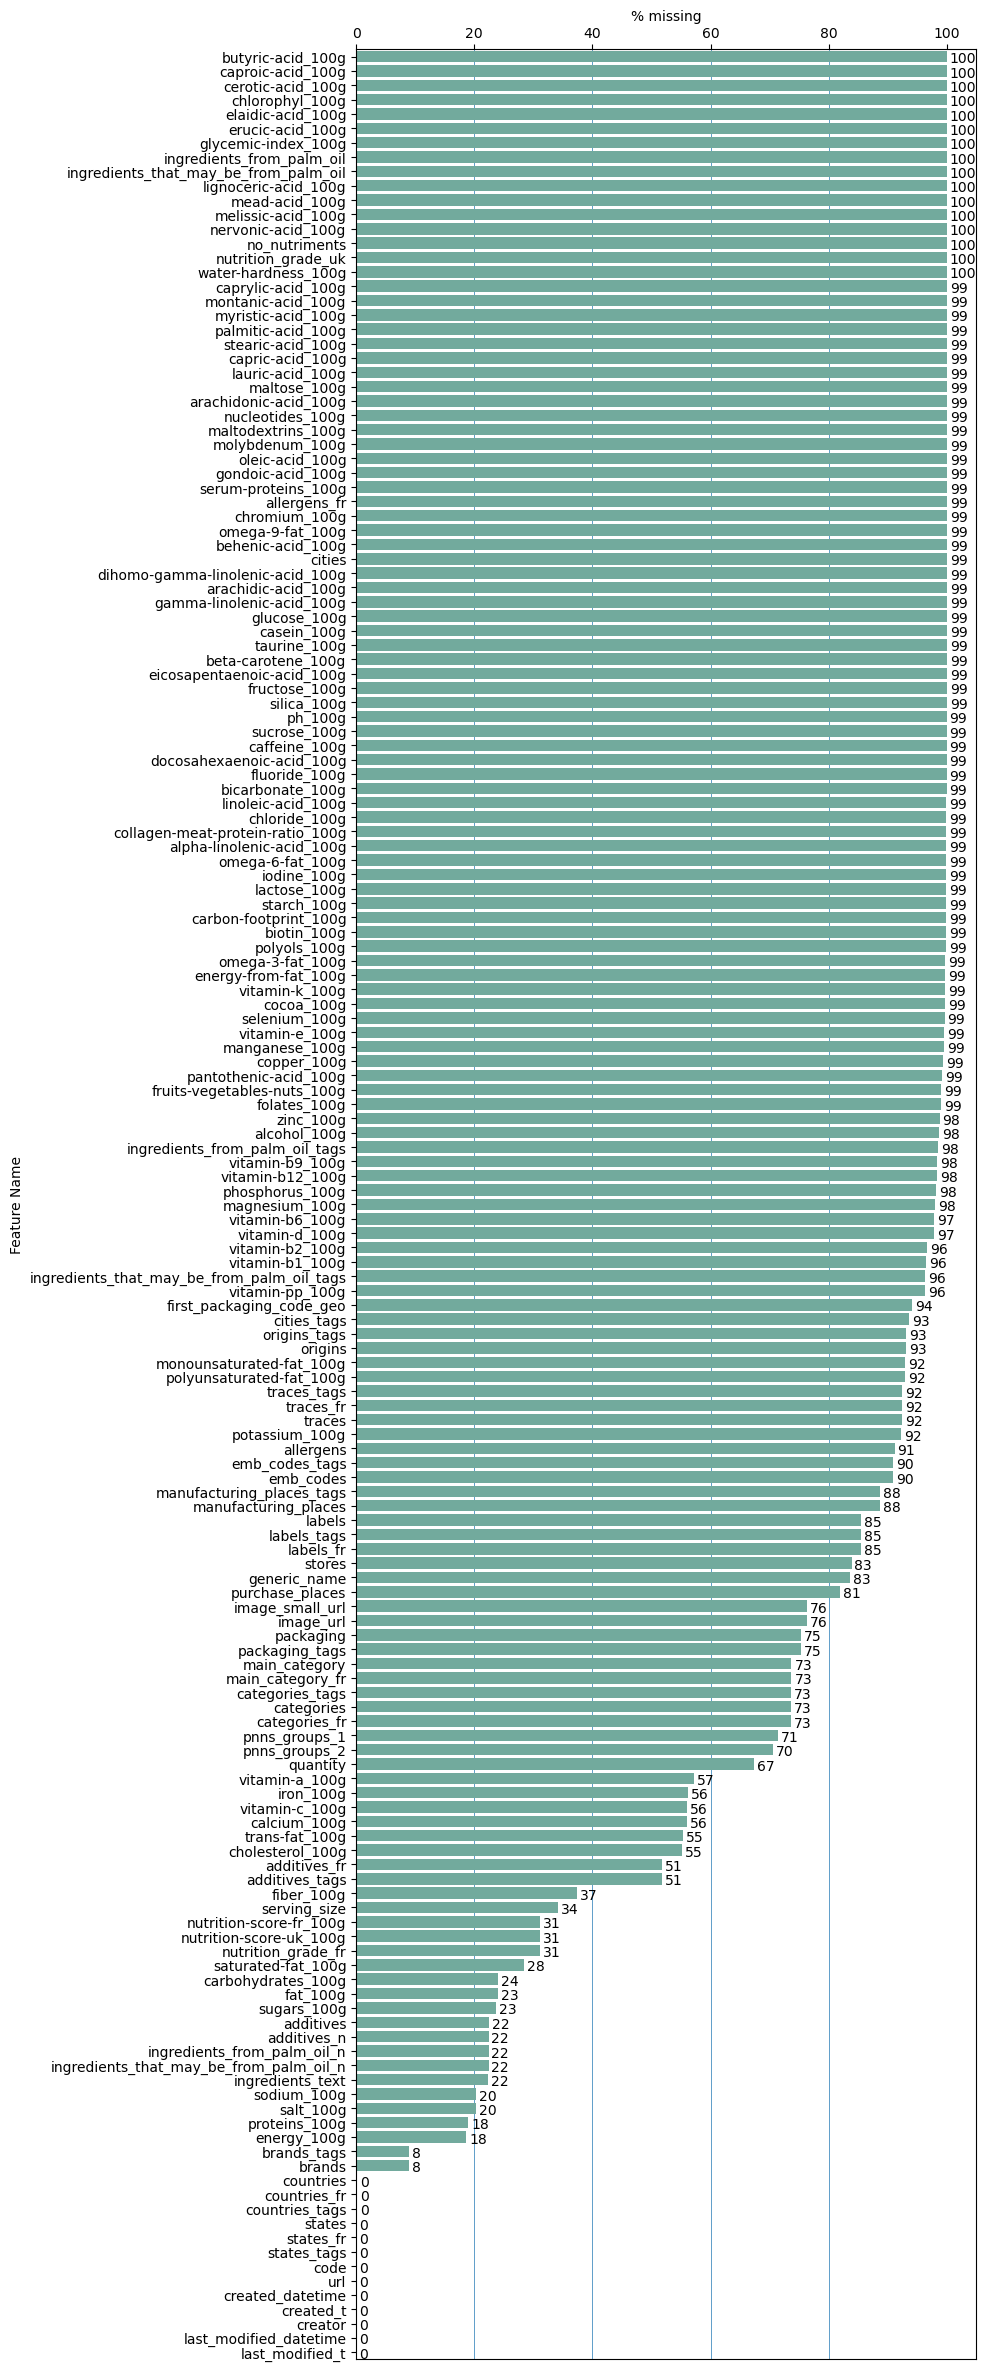

In [203]:
# valeurs nulles en pourcentage et triées
def percent_missing(df):
    ds_isnull_prct = (df.isnull().mean()*100)
    
    # set Series to DF for further display
    df_isnull_prct = pd.DataFrame({
        "Feature Name": df.columns,
        "% missing": ds_isnull_prct,
        }).sort_values(by=["% missing", "Feature Name"],
                       ascending=[False, True]
                       ).reset_index(drop=True)
    
    return df_isnull_prct

# afficher la valeur sur l'axe
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

data_nulls_by_value = percent_missing(data_raw)

plt.figure(figsize=(8, 30))

sns_t = sns.barplot(
    x="% missing", 
    y="Feature Name", 
    data=data_nulls_by_value, 
    color='#69b3a2'
)

sns_t.xaxis.set_ticks_position("top")
sns_t.xaxis.set_label_position('top')
sns_t.axvline(x=20, ymin=0, linewidth=0.5, zorder=0)
sns_t.axvline(x=40, ymin=0, linewidth=0.5, zorder=0)
sns_t.axvline(x=60, ymin=0, linewidth=0.5, zorder=0)
sns_t.axvline(x=80, ymin=0, linewidth=0.5, zorder=0)

show_values_on_bars(sns_t, "h", 0.5)
print(data_nulls_by_value.shape)

In [240]:
# classe de valeurs manquantes (pas élégant, mais fonctionnel)
def bin_prct(prct):
    if (prct >= 10 and prct < 20):
        return "10-20%"
    elif (prct >= 20 and prct < 30):
        return "20-30%"
    elif (prct >= 30 and prct < 40):
        return "30-40%"
    elif (prct >= 40 and prct < 50):
        return "40-50%"
    elif (prct >= 50 and prct < 60):
        return "50-60%"
    elif (prct >= 60 and prct < 70):
        return "60-70%"
    elif (prct >= 70 and prct < 80):
        return "70-80%"
    elif (prct >= 80 and prct < 90):
        return "80-90%"
    elif (prct >= 90 and prct <= 100):
        return "90-100%"
    else:
        return "0-10%"

data_nulls_by_value['bin'] = data_nulls_by_value['% missing'].apply(bin_prct)

# no zeros (pas possible afficher aire sinon)
# (très peu de lignes concernées, ne change pas répartition)
data_nulls_by_value = data_nulls_by_value[data_nulls_by_value['% missing']!=0]

fig = px.sunburst(data_nulls_by_value,
                  path=['bin','Feature Name'],
                  values='% missing',
                  color='% missing',
                  hover_data=['% missing'],
                  color_continuous_scale='RdBu',
                  )
fig.show()

## Constat <a name="constat"></a>

Notre tour d'horizon des données met en lumière plusieurs points :
- les données sont **souvent remplies** par les utilisateurs, avec plus de 320 000 observations
- mais la **qualité de ce remplissage n'est pas forcément au rendez-vous** avec une majorité des valeurs manquantes à plus de 90%.

Tous les champs ne sont pas à remplir, comme la teneur en potassium d'un produit n'en contenant pas, par exemple.  
Mais des valeurs comme l'énergie pour 100g ne peuvent a priori pas être nulles.

Les **variables manquant de données à plus de 60% sont écartées** car leur remplissage générerait un biais trop important.

Pour les données pertinentes manquantes et les outliers, nous devrons trouver des méthodes d'imputation.

# <a name="choix">Choix d'étude : Nutri-Score</a>

Au vu de l'**activité du client** et des **données restantes pouvant être étudiées**, il me paraît pertinent de répondre à sa demande en nous intéressant au **Nutri-Score**.  
3 variables peuvent faire partie de notre cible :
- `nutrition_grade_fr`
- `nutrition-score-fr_100g`
- `nutrition-score-uk_100g`

Pour chacune d'entre elles il **manque 31% des données**, ce est suffisamment important pour devoir être comblé, d'autant que c'est là un des coeurs d'activités du client.

## Calculs et classification du Nutri-Score <a name="nutriscore"></a>

Voici les modalités de **calcul général du nutri-score et la classification** qui s'en suit :

> <img title="Nutri-Score : calcul général" src="https://julmat.fr/OCP2/nutriscore_general_calculation.png" height="200">
> <img title="Nutri-Score : classification" src="https://julmat.fr/OCP2/nutriscore_classification.png" height="200">

Sources : [Informations OpenFoodFacts sur le Nutriscore](https://fr.openfoodfacts.org/nutriscore) et [Calcul du nutriscore (PDF, dern. màj 2022-09-27)](https://www.santepubliquefrance.fr/media/files/02-determinants-de-sante/nutrition-et-activite-physique/nutri-score/qr-scientifique-technique-en)

Cela nous amène à plusieurs problématiques :
- déjà, malgré une règle générale simple, la **complexité de calcul** (produits couverts ou non, gestion des exceptions, des règles spécifiques...) ne nous permet pas, à partir de notre seul jeu de données, de produire un nutri-score fiable ;
- ajoutons à cela les **mises à jour régulières des calculs** du Nutri-Score, dont une en cours.

L'utilisation du **Machine Learning semble _a priori_ indiquée pour approcher cette valeur** avec une certaine fiabilité à partir du jeu de données dont nous disposons.

## Affinage des variables et choix de cible <a name="affinage"></a>

Les 3 variables cibles potentielles doivent maintenant être comparées afin de choisir la variable cible la plus pertinente.

Cherchons d'abord les différences potentielles entre `nutrition-score-fr_100g` et `nutrition-score-uk_100g` :

In [205]:
df_nutri = data_raw.loc[
    data_raw['nutrition-score-fr_100g'] != data_raw['nutrition-score-uk_100g']]

with pd.option_context('display.max_rows', 200, 'display.max_columns', None): 
    display(df_nutri[['nutrition-score-fr_100g', 'nutrition-score-uk_100g',
                     'nutrition_grade_fr']].dropna(how="all").sort_index(ascending=True))

,nutrition-score-fr_100g,nutrition-score-uk_100g,nutrition_grade_fr
product_name,,,
Bridelight 3% Les carrés fondants goût Emmental,6.0,11.0,c
100 % Pur Jus Pomme,3.0,-3.0,c
Douceur du Matin,5.0,-4.0,c
Edition Limitée Mandarine Kiwi Citron,5.0,-4.0,c
Frisch-Genuss,9.0,13.0,c
...,...,...,...
NaN,7.0,1.0,d
NaN,33.0,28.0,e
NaN,10.0,15.0,c


Il y a donc une **différence sur certaines observations dans les scores de nutrition FR et UK**.  
Ces observations représentant **8322 lignes sur 276234 (≈ 3%** des données exploitables).

Après étude métier, cela est dû à une différence dans le mode de calcul : c'est le **Nutrition Score français qui est utilisé pour la classification du Nutri-Score** et il est **lui-même dérivé du Nutrition Score anglais**.  
C'est une **variable numérique discrète** comprise entre -15 et 40.

## Boisson ou pas ? <a name="boisson"></a>

Il est tentant de prime abord de vouloir utiliser une variable de ce type pour ensuite déterminer le Nutri-Score.  
Cependant, cela impliquerait d'utiliser une variable non exprimée : **le produit étudié est-il une boisson ou non** ?  

Cette information a un **impact déterminant sur le Nutri-Score** : comme le montre le tableau ci-avant, à score final égal, on n'a pas le même logo en fonction du type d'aliment (solide ou liquide).  
Or elle n'est **pas clairement exprimée dans le jeu de données**, il serait trop complexe de le déterminer (utilisation conjointe des variable type `category`, `serving_size`, `packaging` puis traitement avancé de textes multi-langages...).

Nous allons donc **nous concentrer directement sur la variable `nutrition_grade_fr` et enlever les deux autres** de notre jeu de données d'entraînement.

# <a name="nettoyage">Nettoyage des données</a>

## Traitement des variables <a name="features_clean"></a>

Certaines variables ont été identifiées comme peu pertinentes, notamment :
- celles qui semblent obligatoires pour l'utilisateur et **remplies d'office** (e.g. `creator`, `code`, `url`, etc.)
- celles dont l'**obtention est automatique ou automatisable** à partir d'autres variables (`created_datetime`, `last_modified_t`, `additives`, etc.)
- celles qui **manquent de pertinence** pour la variable cible (`countries`, `labels`, `manufacturing_places`, etc.)
- celles dont le **format de données est trop peu compatible** avec l'étude en cours et qui nécessiteraient un traitement trop important, par exemple les données contenant des tags ou des chaînes de caractères dont le format utilisateur est libre (`ingredients_text`, `categories_fr`, etc.).  
Elles pourront servir dans les contrôles ou l'interprétation des résultats.

NB : si des données comme `origin`, `packaging`, `ingredients_from_palm_oil`, `purchase_places`, `manufacturing_places` ou `countries` ont été écartées faute de pertinence, elles pourraient toutefois avoir un intérêt avec d'autres études comme l'Éco Score, l'impact socio-économique des fabrications à l'étranger, etc.

Sont aussi écartées :
- les variables **100% vides**
- les variables avec **plus de 60% de valeurs manquantes** car leur remplissage aurait trop d'impact sur les données

Enfin, les lignes totalement vides sont supprimées et le pourcentage de valeurs manquantes remis à jour.

Les impacts de ce nettoyage sont monitorés au fur et à mesure.

In [206]:
# suppression des variables à écarter
excluded_features = ['additives', 'additives_fr', 'additives_tags',
                      'allergens', 'allergens_fr',
                      'brands', 'brands_tags',
                      'categories', 'categories_fr', 'categories_tags',
                      'cities', 'cities_tags', 'code',
                      'countries', 'countries_fr', 'countries_tags',
                      'created_datetime', 'created_t', 'creator',
                      'emb_codes', 'emb_codes_tags',
                      'first_packaging_code_geo',
                      'generic_name', 'image_small_url', 'image_url',
                      'ingredients_text',
                      'ingredients_from_palm_oil',
                      'ingredients_from_palm_oil_n',
                      'ingredients_from_palm_oil_tags',
                      'ingredients_that_may_be_from_palm_oil',
                      'ingredients_that_may_be_from_palm_oil_n',
                      'ingredients_that_may_be_from_palm_oil_tags',
                      'labels', 'labels_fr', 'labels_tags',
                      'last_modified_t', 'last_modified_datetime',
                      'main_category', 'main_category_fr',
                      'manufacturing_places', 'manufacturing_places_tags',
                      'nutrition-score-fr_100g', 'nutrition-score-uk_100g',
                      'origins', 'origins_tags',
                      'packaging', 'packaging_tags',
                      'pnns_groups_1', 'pnns_groups_2',
                      'purchase_places', 'quantity', 'serving_size',
                      'states', 'states_fr', 'states_tags', 'stores',
                      'traces', 'traces_tags', 'traces_fr', 'url']
df_clean_excluded_features = data_raw.drop(excluded_features, axis=1)

print(f"DF brut : {data_raw.shape}")
print("DF après nettoyage des variables exclues : {}".format(
    df_clean_excluded_features.shape))

DF brut : (320772, 161)
DF après nettoyage des variables exclues : (320772, 101)


In [207]:

# suppression des variables totalement vides
df_no_feature = df_clean_excluded_features.dropna(axis=1, how='all')

print("DF après nettoyage des variables vides : {}".format(
    df_no_feature.shape))

DF après nettoyage des variables vides : (320772, 87)


In [208]:
# filtre des variables < 60% nulls
features_nullprct = df_no_feature.isnull().mean()*100
mask = features_nullprct <= 60

# création du DF nettoyé
df = df_no_feature[features_nullprct[mask].index]
display(df.T.sort_index())

product_name,Farine de blé noir,Banana Chips Sweetened (Whole),Peanuts,Organic Salted Nut Mix,Organic Polenta,Breadshop Honey Gone Nuts Granola,Organic Long Grain White Rice,Organic Muesli,Organic Dark Chocolate Minis,Organic Sunflower Oil,...,Szprot w oleju roslinnym,Thé vert Earl grey,"Cheese cake thé vert, yuzu",Rillette d'oie,NaN,Tomato & ricotta,"Mint Melange Tea A Blend Of Peppermint, Lemon Grass And Spearmint",乐吧泡菜味薯片,Tomates aux Vermicelles,"Sugar Free Drink Mix, Peach Tea"
additives_n,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,7.0
calcium_100g,NaN,0.0,0.071,0.143,NaN,0.038,0.044,0.062,0.05,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
carbohydrates_100g,NaN,64.29,60.71,17.86,77.14,63.46,80.0,57.81,55.0,NaN,...,NaN,0.5,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0
cholesterol_100g,NaN,0.018,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
energy_100g,NaN,2243.0,1941.0,2540.0,1552.0,1933.0,1490.0,1833.0,2406.0,3586.0,...,NaN,21.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2092.0
fat_100g,NaN,28.57,17.86,57.14,1.43,18.27,NaN,18.75,37.5,100.0,...,NaN,0.2,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0
fiber_100g,NaN,3.6,7.1,7.1,5.7,7.7,NaN,9.4,7.5,NaN,...,NaN,0.2,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
iron_100g,NaN,0.00129,0.00129,0.00514,NaN,0.00346,NaN,0.00422,0.01125,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
nutrition_grade_fr,NaN,d,b,d,NaN,NaN,NaN,c,NaN,NaN,...,NaN,c,NaN,NaN,NaN,NaN,b,NaN,NaN,NaN
proteins_100g,NaN,3.57,17.86,17.86,8.57,13.46,8.89,14.06,5.0,NaN,...,NaN,0.5,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0


## Traitement des observations <a name="observations_clean"></a>

Attention : traitement des individus ! La proportion de nulls va changer.

In [209]:
# suppression des index vides (product_name)
df = df[df.index.notnull()]

print("Après suppression des index vides : {}".format(df.shape))

Après suppression des index vides : (303010, 17)


In [210]:
# suppression des lignes vides
df.dropna(axis=0, how="all", inplace=True)

print("Après suppression des lignes vides : {}".format(df.shape))

Après suppression des lignes vides : (272607, 17)


In [211]:
# suppression des doublons
# (après intégration de l'index dans les variables)
df = df.reset_index().drop_duplicates().set_index('product_name')

print("Après suppression des doublons : {}".format(df.shape))

Après suppression des doublons : (255808, 17)


## Impact du nettoyage <a name="impact"></a>

In [212]:
# calcul de l'impact
feat_impact = data_raw.shape[1] - df.shape[1]
obs_impact = data_raw.shape[0] - df.shape[0]
feat_impact_prct = np.round(feat_impact / data_raw.shape[1] * 100, 2)
obs_impact_prct = np.round(obs_impact / data_raw.shape[0] * 100, 2)

print("Impact du nettoyage sur les variables : {} colonnes, soit  {}%"
      .format(feat_impact, feat_impact_prct))
print("Impact du nettoyage sur les observations : {} individus, soit  {}%"
      .format(obs_impact, obs_impact_prct))

Impact du nettoyage sur les variables : 144 colonnes, soit  89.44%
Impact du nettoyage sur les observations : 64964 individus, soit  20.25%


In [213]:
# affichage des variables restantes et % nulls mis à jour
df_prct_missing = percent_missing(df)

fig = px.histogram(df_prct_missing, x="% missing", 
    y="Feature Name",
    width=800, height=df_prct_missing.shape[0]*24
    ).update_yaxes(categoryorder='category descending')

fig.show()

## Traitement des outliers <a name="outliers"></a>

In [214]:
df.describe().T.sort_index()

,count,mean,std,min,25%,50%,75%,max
additives_n,230428.0,1.975532,2.528739,0.00000,0.000000,1.00000,3.000000,3.100000e+01
calcium_100g,130499.0,0.126460,3.449166,0.00000,0.000000,0.03600,0.106000,6.947370e+02
carbohydrates_100g,224930.0,32.346464,29.648468,0.00000,6.300000,21.43000,58.577500,2.916670e+03
cholesterol_100g,132645.0,0.020223,0.372992,0.00000,0.000000,0.00000,0.021000,9.523800e+01
energy_100g,242364.0,1140.249870,6682.821967,0.00000,389.000000,1100.00000,1674.000000,3.251373e+06
fat_100g,225233.0,12.505845,16.861998,0.00000,0.000000,5.29000,20.000000,7.142900e+02
fiber_100g,187613.0,2.853782,13.247695,-6.70000,0.000000,1.50000,3.600000,5.380000e+03
iron_100g,129895.0,0.003793,0.222955,-0.00026,0.000000,0.00103,0.002400,5.000000e+01
proteins_100g,241222.0,7.122876,8.396179,-800.00000,0.780000,4.90000,10.000000,4.300000e+02
salt_100g,237203.0,2.036186,133.102068,0.00000,0.070000,0.59690,1.384300,6.431280e+04


### Planchers et plafonds <a name="bornes"></a>

Sauf pour l'énergie, chaque variable "pour 100g" ne doit ni être négative ni dépasser 100.  
Le choix est donc fait de mettre pour ces 14 variables un plancher à 0 et un plafond à 100 :

In [215]:
def elisabeth(x):
    if x < 0:
        x = 0
    elif x > 100:
        x = 100
    else:
        pass
    return x

# on enlève les variables non concernées
df_100g = df.filter(regex="^(?!energy).*100g$")

for column in df_100g:
    df_100g[column] = df_100g[column].apply(elisabeth)

C:\Users\jlemaire\AppData\Local\Temp\ipykernel_19824\4021903435.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Réintégration des variables exclues :

In [216]:
df_100g['additives_n'] = df['additives_n']
df_100g['energy_100g'] = df['energy_100g']
df_100g['nutrition_grade_fr'] = df['nutrition_grade_fr']

df = df_100g.reindex(sorted(df_100g.columns), axis=1)

C:\Users\jlemaire\AppData\Local\Temp\ipykernel_19824\999415876.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jlemaire\AppData\Local\Temp\ipykernel_19824\999415876.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Vérification du traitement :

In [217]:
display(df.shape)
df.describe().T

(255808, 17)

,count,mean,std,min,25%,50%,75%,max
additives_n,230428.0,1.975532,2.528739,0.0,0.000000,1.00000,3.000000,31.000
calcium_100g,130499.0,0.109105,1.063280,0.0,0.000000,0.03600,0.106000,100.000
carbohydrates_100g,224930.0,32.332017,29.011690,0.0,6.300000,21.43000,58.577500,100.000
cholesterol_100g,132645.0,0.020223,0.372992,0.0,0.000000,0.00000,0.021000,95.238
energy_100g,242364.0,1140.249870,6682.821967,0.0,389.000000,1100.00000,1674.000000,3251373.000
fat_100g,225233.0,12.501847,16.781058,0.0,0.000000,5.29000,20.000000,100.000
fiber_100g,187613.0,2.824104,4.577639,0.0,0.000000,1.50000,3.600000,100.000
iron_100g,129895.0,0.003793,0.222955,0.0,0.000000,0.00103,0.002400,50.000
proteins_100g,241222.0,7.126912,8.125493,0.0,0.780000,4.90000,10.000000,100.000
salt_100g,237203.0,1.628105,6.462533,0.0,0.070000,0.59690,1.384300,100.000


### Traitement métier : acides gras <a name="legrascestlavie"></a>

Il ne peut pas y avoir davantage d'acides gras saturés (`saturated-fat`) ou acides gras trans (`trans-fat`) que d'acides gras (`fat`).  
Pour chaque observation, il faut donc **plafonner `saturated-fat` et `trans-fat`** avec un maximum donné par `fat`.

**D'autres manipulations seraient cohérentes mais impossibles sans connaissance métier et produit approfondies**, comme par exemple vérifier le lien avec `cholesterol` ou bien vérifier que `saturated-fat` + `trans-fat` soit inférieur ou égal à `fat`. Dans ce dernier exemple, on ne peut simplement pas savoir lequel des deux diminuer si leur somme excède `fat`.  

In [218]:
satfat_mask = df['saturated-fat_100g'] > df['fat_100g']
transfat_mask = df['trans-fat_100g'] > df['fat_100g']

display(df.loc[satfat_mask].shape)
display(df.loc[transfat_mask].shape)

(337, 17)

(52, 17)

In [219]:
df.loc[satfat_mask, 'saturated-fat_100g'] = df.loc[satfat_mask, 'fat_100g']
df.loc[transfat_mask, 'trans-fat_100g'] = df.loc[transfat_mask, 'fat_100g']

# mask plus utilisé car gardé en mémoire : output faux sinon
display(df.loc[df['saturated-fat_100g'] > df['fat_100g']].shape)
display(df.loc[df['trans-fat_100g'] > df['fat_100g']].shape)

(0, 17)

(0, 17)

### Traitement métier : sel <a name="sel"></a>

Pour le sel alimentaire (`salt`) et sa relation avec le sodium (`sodium`), on ne devrait **pas trouver moins de 39,34% de sodium** (% masse molaire du sodium) **que de sel** total.  

Il peut cependant y en avoir davantage, puisque le sodium existe sous d'autres formes que le sel (e.g. minéraux dans l'eau).

In [220]:
nask = df['sodium_100g'] < (df['salt_100g'] * 0.3934)

display(df.loc[nask].shape)

(840, 17)

In [221]:
df.loc[nask, 'sodium_100g'] = df.loc[nask, 'salt_100g'] * 0.3934

display(df.loc[df['sodium_100g'] < (df['salt_100g'] * 0.3934)].shape)

(0, 17)

In [222]:
display(df.T)

product_name,Banana Chips Sweetened (Whole),Peanuts,Organic Salted Nut Mix,Organic Polenta,Breadshop Honey Gone Nuts Granola,Organic Long Grain White Rice,Organic Muesli,Organic Dark Chocolate Minis,Organic Sunflower Oil,Organic Adzuki Beans,...,Natural Cassava,Raspados Ice Bars,Tartines craquantes bio au sarrasin,Test NF App,Amandes,Miel de Camargue,Thé vert Earl grey,Rillette d'oie,"Mint Melange Tea A Blend Of Peppermint, Lemon Grass And Spearmint","Sugar Free Drink Mix, Peach Tea"
additives_n,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,8.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,7.0
calcium_100g,0.0,0.071,0.143,NaN,0.038,0.044,0.062,0.05,NaN,0.062,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
carbohydrates_100g,64.29,60.71,17.86,77.14,63.46,80.0,57.81,55.0,NaN,62.5,...,87.06,21.05,74.8,12.2,NaN,NaN,0.5,NaN,0.0,0.0
cholesterol_100g,0.018,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
energy_100g,2243.0,1941.0,2540.0,1552.0,1933.0,1490.0,1833.0,2406.0,3586.0,1393.0,...,1477.0,368.0,1643.0,569.0,2406.0,NaN,21.0,NaN,0.0,2092.0
fat_100g,28.57,17.86,57.14,1.43,18.27,NaN,18.75,37.5,100.0,1.04,...,0.0,0.0,2.8,31.0,NaN,NaN,0.2,NaN,0.0,0.0
fiber_100g,3.6,7.1,7.1,5.7,7.7,NaN,9.4,7.5,NaN,12.5,...,4.7,NaN,5.9,1.1,12.2,NaN,0.2,NaN,0.0,NaN
iron_100g,0.00129,0.00129,0.00514,NaN,0.00346,NaN,0.00422,0.01125,NaN,0.0045,...,0.00127,NaN,0.0038,NaN,NaN,NaN,NaN,NaN,0.0,NaN
nutrition_grade_fr,d,b,d,NaN,NaN,NaN,c,NaN,NaN,NaN,...,a,NaN,a,NaN,b,NaN,c,NaN,b,NaN
proteins_100g,3.57,17.86,17.86,8.57,13.46,8.89,14.06,5.0,NaN,22.92,...,1.18,0.0,13.0,2.1,21.22,NaN,0.5,NaN,0.0,0.0


# <a name="analyse">Analyse des données</a>


## Analyse de notre cible : `nutrition_grade_fr` <a name="analyse_univ"></a>

In [239]:
# récupération des données et traitement
temp_pie = df['nutrition_grade_fr']\
    .value_counts(dropna=False)\
    .sort_index()\
    .reset_index()\
    .rename(columns={
        'index': 'grade',
        'nutrition_grade_fr': 'count'
        })

# pro forma
for i, e in enumerate(temp_pie['grade']):
    temp_pie['grade'][i] = str(e).upper()

# détail colorimétrique
nutri_color = {'A': '#038141',
               'B': '#85bb2f',
               'C': '#fecb02',
               'D': '#ee8100',
               'E': '#e63e11',
               'NAN': '#dddddd'
               }

# diagramme en secteurs
fig = px.pie(temp_pie,
             values="count",
             names="grade",
             title="Répartition du Nutri-Score",
             color="grade",
             hover_name="grade",
             color_discrete_map=nutri_color,
             )
fig.update_traces(sort=False)
fig.update_layout(width=500, height=500)
fig.show()

# diagramme en barres
fig = px.bar(temp_pie,
             y="grade",
             x="count",
             color="grade",
             orientation="h",
             hover_name="grade",
             color_discrete_map=nutri_color,
             )
fig.update_layout(width=600, height=500)
fig.show()

C:\Users\jlemaire\AppData\Local\Temp\ipykernel_19824\4052271825.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



*******************
# TODO
*******************

- 3 propositions d'**imputation** à faire :
  - tester + montrer prq pas top : moyenne
  - tester + montrer prq pas top : moyenne avec DF divisé en 5 (selon nutrition_grade)
  - **imputation par KNN** avec cross-validation & trouver bon $k$ (commencer par spliter le DS selon bins variable cible pour moyenne pas trop éloignée)
- boxplot sur variables clean
- voir Feature importance
- Effectuer une **analyse univariée pour chaque variable intéressante**, afin de synthétiser son comportement
  - répartition, etc.
  - choix graphique selon variable
- faire analyse univariée + bivariée selon cours OC : <https://openclassrooms.com/fr/courses/7410486-nettoyez-et-analysez-votre-jeu-de-donnees/7427699-representez-la-distribution-empirique-dune-variable>
- Sélectionner / créer des variables à l’aide d’une **analyse multivariée**. Effectuer les **tests statistiques** appropriés pour vérifier la significativité des résultats
- ACP ac matrice corrélation + ANOVA + p-value (cf. TP OC 2.4, split values)
- NB & présentat° : **en quoi ce projet respecte les 5 grands principes du RGPD** → montrer l'absence de lien entre travail et RGPD
- NB & présentat° : **rapport d’exploration** et une **conclusion pour expliquer la faisabilité de l’application** demandée

**CHECK**
  - référentiel évaluation pr vérif pas oublis
  - 1 type de visuel de chaque : boxplot, barplot, pie chart, histogramme, scatter plot

**Présentation** pour néophytes :  
- présentation Sunburst : faire **vue globale + vue seuil conservé**
- point RGPD après survol des données
- opérations de nettoyage effectuées
- description et analyse univariée des différentes variables importantes avec les visualisations associées
- analyse multivariée et les résultats statistiques associés, en lien avec l’idée d’application du client
- 3 observations solidement étayées (graphes et/ou tests statistiques à l’appui au besoin) évaluant la pertinence et la faisabilité de l’idée application du client.
- synthèse des différentes conclusions sur la faisabilité de votre projet.

*******************

# <a name="ameliorations">Suggestions d'améliorations</a>

(éco-score & produits laitiers ; ergonomie, ui, ux application)

Catégorie : **solide ou liquide** = forte influence sur le nutri-score et seulement disponible dans la `category`.  
Distinguer clairement dès le début de la saisie (et préciser que les huiles ne sont pas des boissons).

**Éco-score + socio-score** :  
montrer les trajets sur une carte animée pour chaque produit (origine des ingrédients → fabrication → conditionnement intermédiaire → packaging → distribution), calculer les distances et visualiser rapidement des informations sur chaque étape (salaire moyen, droit du travail, condition animale, ...)  
création d'un score social ?

Variables à remplir **par user avec suggestion** :
- additives_tags → remplit automatiquement : additives_n, additives, additives_fr
- brands → remplit automatiquement : brands_tags (nouvelle marque ajoutable par user, suggérer existantes si ressemblantes)
- countries_tags → remplit automatiquement : countries, countries_fr
- states_tag → remplit automatiquement : states, states_fr

In [ ]:
sns.heatmap(df.isna())

# OUTILS & NOTES A SUPPRIMER

In [ ]:
# À SUPPRIMER outil JL
# Vérification rapide d'une variable / valeur selon regex

regex_ = "100g"

df_temp = df.filter(regex=regex_).dropna(how="all")

with pd.option_context('display.max_rows', None):
    display(df_temp
            .filter(regex=".*", axis=0)
            .filter(regex=regex_)
            .dropna(how="all")
            # .T
            .sort_index(ascending=True)
            [0:20])

À RANGER

**************

pour contexte temporaire qui saute, mettre :
``` python
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
   display(mon_df[:50]) # lignes dispos direct sans iloc
   display(mon_df.iloc[0:20, :5]) # 20 prem lignes, 5 prem colonnes

```

**************

à tester
``` python
sns.heatmap(df.isna())
```

**************

pour test de charge, exécute plusieurs fois la commande et fait une moyenne de durée
```
%%timeit
```

**************

``` python
nulls = []
for col in df:
   nulls.append(df['col'].isna().sum()

plt.hist(nulls, bins=10)
bins = np.arange(0, 100 ,10)
bins = bins
```

**************

`df.apply(fonction)`

``` python
df['nouvelle_colonne'] = df['colonne_x'].apply(fonction, axis=)
```

***********

<https://stackoverflow.com/questions/49161120/set-value-of-one-pandas-column-based-on-value-in-another-column>
``` python
df.loc[df['c1'] == 'Value', 'c2'] = 10
```

***********